# This is the file where I am going to keep all of the classes so that I can make changes here and the PRs can be read more easily

In [ ]:
!pip install yfinance
!pip install numpy-financial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Not uninstalling pytz at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-105b7869-0f00-4597-9a64-7d280f181d26
    Can't uninstall 'pytz'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
databricks-feature-store 0.11.1 requires pyspark<4,>=3.1.2, which is not installed.
mlflow-skinny 2.2.1 requ

In [1]:
import yfinance as yf
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
import holidays
from datetime import datetime, timedelta
from pandas.tseries.offsets import BDay
import numpy as np
import numpy_financial as npf
from typing import List, Dict, Optional
from collections import defaultdict
import matplotlib.pyplot as plt


In [2]:
#Class #1

class DataLoad:
    """
    This class will be used to load in the data used for the trading methods used later.

    Attributes:
    


    """

    def __init__(self) -> None:
        self.histData = [("VGT", '2004-01-26' , 0.10, 'Technology Sector'), ("IVV",'2000-05-15', 0.03, 'Large-Cap Blend'), 
               ("SWPPX", '1997-05-19', 0.02, 'Large-Cap Blend'), ("VTI",'2001-05-24' , 0.03, 'Large Blend'), 
               ("DIA",'1998-01-13', 0.16, 'Large Value'), ("QQQ",'1999-03-10', 0.20, 'Large Growth'), ("IWM",'2000-05-22', 0.19, 'Small-Cap Blend'), 
               ("DBC",'2006-02-03', 0.85, 'Commodities Broad Basket'), ("SWTSX",'1999-06-01', 0.03, 'Large-Cap Blend'), 
               ("WFIVX",'1999-02-01', 0.54, 'Large-Cap Growth'), ("VNQ",'2004-09-23', 0.12, 'Real Estate'), ("SMH",'2011-12-20', 0.35, 'Semiconductors'), 
               ("FNCMX", '2003-09-25', 0.29, 'Large-Cap Growth'), ("OEF", '2000-10-23', 0.20, 'Large Blend'), 
               ("MDY", '1995-05-04', 0.23, 'Mid-Cap Blend'), ("IWO",'2000-07-24', 0.23, 'Small Growth'), ("VUG", '2004-01-26', 0.04, 'Large-Cap Growth'), 
               ("NASDX", '2000-01-18', 0.50, 'Large Growth'), ("SDY", '2005-11-08', 0.35, 'Mid-Cap Value'), 
               ("SSO", '2006-06-19', 0.89, 'Leveraged Large-Cap Blend'), ("GLD", '2004-11-18', 0.40, 'Gold') , 
               ("XLK", '1998-12-16', 0.10, 'Technology Sector'), ("XLV", '1998-12-16', 0.10, 'Healthcare Sector'), 
               ("XLE", '1998-12-16', 0.10, 'Energy Sector'), ("IWV", '2000-05-22', 0.20, 'Large Blend'), ("VGELX", '2001-11-12', 0.25, 'Large-Cap Value'),
               ("VINIX", '1990-07-31', 0.02, 'Large Blend'), ("AGTHX", '1973-12-01', 1.39, 'Large-Cap Growth'), 
               ("VWO", '2005-03-04', 0.08, 'Emerging Markets'), ("VXF", '2001-12-27', 0.06, 'Mid-Cap Blend'), ("SCHD", '2011-10-20', 0.06, 'Large Value'),
               ("VOO",'2010-09-07' ,0.14, 'Large-Cap Blend'),  ('VIG','2006-04-21' , 0.08, 'Large Blend'), ('IWR', '2001-07-17', 0.18, 'Mid-Cap Blend'),
               ('VOE', '2006-08-17', 0.07, 'Mid-Cap Value'), ('VB', '2004-01-26', 0.03, 'Small Blend'), ('VO', '2001-11-12', 0.05, 'Mid-Cap Blend'),
               ('SCHA', '2009-11-03' ,0.04, 'Small Blend'), ('VHT', '2004-02-05', 0.10, 'Healthcare Sector'), 
               ('IHF', '2006-05-01', 0.39, 'Healthcare Sector')]
        self.etfs = ['VGT', 'IVV', 'SWPPX', 'VTI', 'DIA', 'QQQ', 'IWM', 'DBC', 'SWTSX', 'WFIVX', 'VNQ', 'SMH',
            'FNCMX', 'OEF', 'MDY', 'IWO', 'VUG', 'NASDX', 'SDY', 'SSO', 'GLD', 'XLK', 'XLV', 'IWV',
            'VOO', 'VGELX','VINIX', 'AGTHX', 'VWO', 'VXF', 'SCHD', 'XLE', 'VIG', 'IWR', 'VOE', 'VB', 'VO', 'SCHA', 'VHT', 'IHF']

    def Load_Stocks(self) -> None:
    
        stockDataFrame = pd.DataFrame(self.histData , columns=['Stock', 'Inception_Date', 'Expense_Ratio', 'Category'])
        return stockDataFrame
    
    def ShowETFs(self) -> None:
        return self.etfs
    def ShowHistData(self):
        return self.histData
    def StockChoosing(self):
        input_etfs = []
        etf = ""
        while(True):
            etf = input("Enter etf(s)")
            if not etf:
                break
            input_etfs.append(etf)
        return input_etfs


In [4]:
data = DataLoad()

stockData = data.Load_Stocks()
ETFList = data.ShowETFs()
HistData = data.ShowHistData()
stockChoices = data.StockChoosing()


#input_start_date = input("Enter Start Date: \n")
#input_end_date = input("Enter End Date: \n")

In [5]:
stockData

,Stock,Inception_Date,Expense_Ratio,Category
0,VGT,2004-01-26,0.10,Technology Sector
1,IVV,2000-05-15,0.03,Large-Cap Blend
2,SWPPX,1997-05-19,0.02,Large-Cap Blend
3,VTI,2001-05-24,0.03,Large Blend
4,DIA,1998-01-13,0.16,Large Value
5,QQQ,1999-03-10,0.20,Large Growth
6,IWM,2000-05-22,0.19,Small-Cap Blend
7,DBC,2006-02-03,0.85,Commodities Broad Basket
8,SWTSX,1999-06-01,0.03,Large-Cap Blend
9,WFIVX,1999-02-01,0.54,Large-Cap Growth


In [6]:
# Download the historical stock data for each ETF and store it in a dictionary
etf_dict = {}
for etf in ETFList:
    etf_dict[etf] = yf.download(etf)

# Create a new DataFrame to store the closing prices of each ETF
etf_close_data = pd.DataFrame()

# Extract the 'Close' column for each ETF and assign it as a new column in etf_data
for etf in ETFList:
    etf_close_data[etf] = etf_dict[etf]['Close']

# Print the resulting DataFrame
etf_close_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,VGT,IVV,SWPPX,VTI,DIA,QQQ,IWM,DBC,SWTSX,WFIVX,...,SCHD,XLE,VIG,IWR,VOE,VB,VO,SCHA,VHT,IHF
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-30,49.080002,113.610001,17.490000,54.619999,105.080002,37.070000,57.799999,NaN,18.760000,9.36,...,NaN,28.170000,NaN,17.270000,NaN,49.000000,49.349998,NaN,50.049999,NaN
2004-02-02,49.119999,114.029999,17.549999,54.720001,105.300003,36.970001,57.950001,NaN,18.820000,9.39,...,NaN,28.330000,NaN,17.250000,NaN,49.200001,49.709999,NaN,50.570000,NaN
2004-02-03,48.820000,113.980003,17.559999,54.705002,105.150002,36.930000,57.625000,NaN,18.820000,9.39,...,NaN,28.219999,NaN,17.285000,NaN,49.070000,49.509998,NaN,50.889999,NaN
2004-02-04,47.349998,112.949997,17.420000,54.195000,104.779999,36.330002,56.200001,NaN,18.629999,9.29,...,NaN,28.020000,NaN,17.062500,NaN,48.049999,48.959999,NaN,50.930000,NaN
2004-02-05,47.590000,113.199997,17.450001,54.415001,105.129997,36.470001,56.724998,NaN,18.680000,9.31,...,NaN,27.770000,NaN,17.127501,NaN,48.200001,49.090000,NaN,50.660000,NaN


In [7]:
etf_dict

{'VGT':                   Open        High         Low       Close   Adj Close  Volume
 Date                                                                          
 2004-01-30   48.740002   49.240002   48.740002   49.080002   41.682964  117600
 2004-02-02   49.099998   49.119999   48.840000   49.119999   41.716930   65400
 2004-02-03   48.799999   48.820000   48.619999   48.820000   41.462147  231100
 2004-02-04   47.500000   47.500000   47.349998   47.349998   40.213699   51000
 2004-02-05   47.700001   47.700001   47.349998   47.590000   40.417530    2600
 ...                ...         ...         ...         ...         ...     ...
 2023-07-27  454.029999  455.510010  444.220001  446.230011  446.230011  358700
 2023-07-28  450.630005  453.720001  449.820007  452.570007  452.570007  418500
 2023-07-31  453.220001  455.220001  452.140015  454.809998  454.809998  467800
 2023-08-01  452.880005  455.880005  451.609985  455.049988  455.049988  268900
 2023-08-02  450.739990  450.7399

In [19]:
#Class #2

def Calculate_Annualized_Return(invest_dates: list, invest_values: list, final_portfolio_value: float) -> float:
        """
        """
        # get annualized contributions
        annual_contri_d = defaultdict(int)
        for invest_date, invest_value in zip(invest_dates, invest_values):
            year = invest_date.year
            annual_contri_d[year] += invest_value
        
        annual_contri_list = []
        for invest_year in annual_contri_d.keys():
            annual_contri_list.append(annual_contri_d[invest_year])

        # call irr to calculate return
        a = np.array([-1 * invest for invest in annual_contri_list] + [final_portfolio_value])

        return npf.irr(a)

def Calculate_Sharpe_Ratio(invest_dates: list, invest_values: list, buy_in_shares: list, stock_data : pd.DataFrame, risk_free_rate: float = 0.02) -> float:
    """
    Calculate annualized sharpe ratio. Only consider keeping buy-in without any sell.
    A year's return rate = (year_end_value - last_year_end_value - investment_in_year) / last_year_end_value
    """
    # calculate each year's end value and total investment in a year
    yearly_values = {}
    yearly_investments = {}

    df = pd.DataFrame({
        'date': invest_dates, 
        'value': invest_values, 
        'buy_in_share': buy_in_shares
    })
    df = df.set_index('date')
    df['hold_share'] = df['buy_in_share'].cumsum()
    min_year = invest_dates[0].year
    max_year = invest_dates[-1].year
    for year in range(min_year, max_year): # intentionally skip last year because it may not be complete yet
        year_df = df[str(year)]
        year_end_share = year_df.iloc[-1]['hold_share']
        year_end_price = stock_data[str(year)].iloc[-1]['Close']
        year_end_value = year_end_share * year_end_price
        yearly_values[year] = year_end_value
        yearly_invest = year_df['value'].sum()
        yearly_investments[year] = yearly_invest
    
    # calcualate yearly return
    yearly_return_rate = []
    for year in range(min_year+1, max_year):
        last_year_end_value = yearly_values[year-1]
        this_year_end_value = yearly_values[year]
        this_year_invest = yearly_investments[year]
        return_rate = (this_year_end_value - last_year_end_value - this_year_invest) / last_year_end_value
        yearly_return_rate.append(return_rate)

    # calculate sharpe ratio
    yearly_return_rate = np.array(yearly_return_rate)
    excess_returns = yearly_return_rate - risk_free_rate
    sharpe_ratio = np.mean(excess_returns) / np.std(yearly_return_rate)
    
    return sharpe_ratio

class Trade:
    """
    This class will preform most of the trading functionality. Will be added onto when another trading function is added.

    Attributes:


    """

    def __init__(self) -> None:
        self.investment_amount = int(input('How much would you like to invest?'))
        #self.frequency = input('How often do you want the trades to occur (daily, weekly, biweekly, monthly)?')
        self.investment_day = input('Which day of the week do you want the trading to occur?')
        self.stock_exp_ratio = 0 #init as 0, and will update when the function is run.
        self.start_date = '2022-01-01'#input('What is the start date of your trading strategy?')
        self.end_date = '2023-01-01'#input('What is the end date of your trading strategy?')
        self.stock_data = stockData
        self.etf_dict = {}
        self.pct_changes = 0.5

    def HistoricalData(self):
        
        for etf in ETFList:
            self.etf_dict[etf] = yf.download(etf)

        # Create a new DataFrame to store the closing prices of each ETF
        etf_close_data = pd.DataFrame()

        # Extract the 'Close' column for each ETF and assign it as a new column in etf_data
        for etf in ETFList:
            etf_close_data[etf] = self.etf_dict[etf]['Close']

        return etf_close_data
        

    def Dollar_Cost_Average(stock_data : pd.DataFrame, investment_amount : int, frequency : str, investment_day : str, stock_exp_ratio : float, start_date : datetime.date, end_date : datetime.date):
        """
        This function is used to calculate and return the dollar cost average (DCA) for a given ETF and time frame.

        Args:
            stock_data : pandas dataframe
                This is the dataframe that contains all of the stocks being monitored for this project. It is a collection of 39 ETFs.
            investment_amount : int64
                Variable that represents the amount of money being invested in the stock.
            frequency : str
                This argument tells the function how often the trades will occur (i.e weekly, monthly or daily)
            investment_day : str
                This tells the function which day of the week the trades occur. (i.e Monday, Tuesday...)
            stock_exp_ratio : 
            start_date : dateTime
                This variable tells the function which date the trading will begin. And it is stored as a MM/DD/YYYY date format.
            end_date : dateTime
                This variable tells the function which date the trading will end. And it is stored as a MM/DD/YYYY date format.

        Returns:
            Total Investment : float64
                Returns the total amount of money invested.
            Final Value : float64
                Returns the final value of the investment.
            Annualized Return : float64
                This value represents the average of an investments earnings in a one year period.
            Annualized Roi : float64
                This value represents the rate of return for a given period less than one year but computes the value as if it were one year.
            Sharpe Ratio : float64
                This ratio is used to measure risk-relative returns of a trade.
            Longest Losing Streak : int64
                This value represents the longest number of trading days in a row that the function resulted in a loss.
        """
        df = stock_data
        investment_amount = int(investment_amount)
        cal = USFederalHolidayCalendar()
        holiday_dict = holidays.US()
        
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        
        # Define a function to get the next trading day, skipping weekends and holidays
        def Get_Next_Trading_Day(date):
            """
            This is a simple function that is used for finding the next possible trading day. 

            Args:
                date : str
                    Variable that represents the day of the week.
            Returns:
                date : str
                    This is the next available trading day according to the USFederalHolidayCalendar.
            """
            while date.weekday() >= 5 or date in holiday_dict or date in cal.holidays():
                date += BDay(1)
            return date

        # Convert investment_day to a weekday number (Monday=0, Sunday=6)
        #weekday = datetime.strptime(investment_day, '%A').weekday()
        #print('weekday', weekday)
        
        
        if(investment_day.lower() == 'monday'):
            weekday = 0
        elif(investment_day.lower() == 'tuesday'):
            weekday = 1
        elif(investment_day.lower() == 'wednesday'):
            weekday = 2
        elif(investment_day.lower() == 'thursday'):
            weekday = 3
        elif(investment_day.lower() == 'friday'):
            weekday = 4
        
        # Initialize variables
        total_investment = 0
        shares_bought = 0
        last_date = None
        longest_loss_streak = 0
        current_loss_streak = 0
        prev_price = None
        returns = []
        invest_dates = []
        invest_values = []
        close_for_sharpe = []
        buy_in_shares = []
        # Loop through each investment date and buy shares
        date = start_date
        while date <= end_date:

            investment_day = datetime(date.year, date.month, date.day) + timedelta(days=(weekday - date.weekday()) % 7)
           
            investment_day = Get_Next_Trading_Day(investment_day)

            while (investment_day not in df.index):
                investment_day += BDay(1)
                
            # Check if investment_day is within the start and end dates
            if start_date <= investment_day <= end_date:
                # Calculate the investment amount and buy shares at the closing price
                #print(investment_day)
                investment_amount_adjusted = min(investment_amount, total_investment + investment_amount)
                
                #shares_to_buy = investment_amount_adjusted / df.loc[investment_day, 'Close']
                #incorporated exp ratio
                shares_to_buy = (investment_amount * (1 - stock_exp_ratio/100)) / df.loc[investment_day, 'Close']
                buy_in_shares.append(shares_to_buy)

                shares_bought += shares_to_buy
                total_investment += investment_amount_adjusted

                # Track investment date and value
                invest_dates.append(investment_day)
                invest_values.append(investment_amount_adjusted)
        
                # Calculate daily returns
                if last_date:
                    daily_return = (df.loc[investment_day, 'Close'] - prev_price) / prev_price
                    returns.append(daily_return)

                    # Track longest losing streak
                    if daily_return < 0:
                        current_loss_streak += 1
                        longest_loss_streak = max(longest_loss_streak, current_loss_streak)
                    else:
                        current_loss_streak = 0

                # Track the last date and closing price
                last_date = investment_day
                prev_price = df.loc[investment_day, 'Close']
                
            close_for_sharpe.append(df.loc[investment_day, 'Close'])
                
            # Increment the date by the specified frequency
            if frequency == 'daily':
                date += timedelta(days=1)
            elif frequency == 'weekly':
                date += timedelta(weeks=1)
            elif frequency == 'biweekly':
                date += timedelta(weeks=2)
            elif frequency == 'monthly':
                date = date.replace(day=1) + timedelta(days=31)
            elif frequency == 'bimonthly':
                date = date.replace(day=1) + timedelta(days=61)
            else:
                raise ValueError('Invalid frequency parameter')


        #total_investment = round(total_investment, 2)
        final_value = shares_bought * df.loc[Get_Next_Trading_Day(end_date), 'Close']
        annualized_return = npf.irr([-total_investment, final_value])
  
        #annualized_roi = (final_value - total_investment) / total_investment / ((end_date - start_date).days / 365)
        #sharpe_ratio = round(np.sqrt(252) * np.mean(returns) / np.std(returns), 4)
        annualized_roi = (final_value - total_investment) / total_investment / ((end_date - start_date).days / 365)
        sharpe_ratio = Calculate_Sharpe_Ratio(invest_dates, invest_values, buy_in_shares, stock_data, risk_free_rate=0.02)
        
        daily_returns = df['Close'].pct_change()

        close_for_sharpe_df = pd.DataFrame(close_for_sharpe, columns=['Close'])
            

        this_returns = close_for_sharpe_df['Close'].pct_change()

        #sharpe_ratio = np.sqrt((end_date - start_date).days / 365) * this_returns.mean() / this_returns.std()
        #sharpe_ratio =  (np.mean(returns)
        #risk-free rate as of 6/16 was 3.77% where as the T-Bond RFRate was 6.89%
        
        losing_streaks = (daily_returns < 0).astype(int).groupby(pd.Grouper(freq='W')).sum()
        longest_losing_streak = losing_streaks.max()


        return total_investment, final_value, annualized_return, annualized_roi, sharpe_ratio, longest_losing_streak

    def Single_DCA_Test(self): 
        """
        This function preforms a single dollar cost average strategy that uses the a list of ETFs provided by the user.

        Returns:
            dca_all_stocks : dataFrame
                This function returns a dataframe that contains the columns listed right below \/. This dataframe will give the end-user a roundabout idea of how well this strategy preformned.
        """

        dca_all_stocks= pd.DataFrame(columns=['Stock', 'expense_ratio','investment_amount', 'frequency', 'investment_day', 'total_investment', 'final_value', 'annualized_return',
                                                'annualized_roi', 'sharpe_ratio', 'longest_losing_streak'])

        for i in range(len(stockChoices)):
            choices = etf_dict[stockChoices[i]]
            stock_exp_ratio = stockData.loc[stockData['Stock'] == stockChoices[i], 'Expense_Ratio'].iloc[0]

            total_investment, final_value, annualized_return, annualized_roi, sharpe_ratio, longest_losing_streak = Trade.Dollar_Cost_Average(choices, self.investment_amount, self.frequency, self.investment_day, stock_exp_ratio, self.start_date, self.end_date)

            dca_all_stocks.loc[len(dca_all_stocks.index)] = [stockChoices[i],stock_exp_ratio, self.investment_amount, self.frequency, self.investment_day, total_investment, final_value, annualized_return, annualized_roi, sharpe_ratio, longest_losing_streak ]

        print(f" {self.start_date} - {self.end_date}")    
        return dca_all_stocks

    def Rebalance(input_etfs : list, weights : float, start_date : datetime.date, end_date : datetime.date, frequency : str):
        """
        This function preforms a rebalancing strategy on a list of ETFs that make up a portfolio.
        
        Args:
            input_etfs : list
                This is the list of ETFs that the portfolio is holding.
            weights : list
                This list represents the weights of each of the ETFs.
            start_date : dateTime
                This represents when the rebalancing will start. Stored as MM/DD/YYYY
            end_date : dateTime
                This represents when the rebalancing period is over. Stored in MM/DD/YYYY format.
            frequency : string
                This variable represents how often the etfs will be rebalanced.

        Returns:
            Rebalanced Returns : float64
                This value represents the returns of the portfolio after the rebalancing has been complete.
            Sharpe Ratio : float64
                The sharpe ratio is how you measure returns by taking risk into consideration.


        """
        
        prices = pd.DataFrame()
        rebalance_frequency = float(frequency)
        
        for etf in input_etfs:
            stock_data = etf_dict[etf]
            prices[etf] = stock_data['Close']
        
        # Select data for the rebalancing period
        prices = prices.loc[start_date:end_date]
    
        # Compute returns and annualized returns for each ETF
        returns = prices.pct_change().dropna()
        #print('returns ', returns)
        annualized_returns = (1 + returns.mean()) ** 252 - 1
        
        # Compute the current weights of each ETF in the portfolio
        current_weights = pd.Series(weights, index=input_etfs)
        
        # Compute the current value of the portfolio
        current_value = (current_weights * prices.iloc[-1]).sum()
        
        # Compute the target value of each ETF in the portfolio
        target_value = current_value * current_weights
        
        # Compute the required number of shares for each ETF
        share_counts = (target_value / prices.iloc[-1])
        
        # Compute the actual weights of each ETF in the rebalanced portfolio
        actual_weights = share_counts * prices.iloc[-1] / current_value
        
        # Compute the rebalanced portfolio's annualized return
        periods_per_year = 0
        if rebalance_frequency == 1:
            # Rebalance every year
            rebalanced_returns = annualized_returns.mean()
            periods_per_year = 1
            
        elif rebalance_frequency == 2:
            # Rebalance every 6 months
            rebalanced_returns = ((1 + annualized_returns).rolling(window=2).apply(np.prod, raw=True) ** (0.5) - 1).mean()
            periods_per_year = 2
        
        # Compute the Sharpe Ratio
        # Compute the daily returns for the rebalanced portfolio
        daily_returns = (actual_weights * returns).sum(axis=1)
        #print('daily_returns ', daily_returns)
        # Compute the mean and standard deviation of the daily returns
        mean_return = daily_returns.mean()
        std_dev = daily_returns.std()
        
        # Compute the Sharpe Ratio assuming a risk-free rate of 0
        #sharpe_ratio = mean_return / std_dev
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        sharpe_ratio = np.sqrt(periods_per_year)*np.sqrt(((end_date - start_date).days / 365))*mean_return / std_dev
        

        
        
        return rebalanced_returns, sharpe_ratio

    def Rebalance_Porfolio(self):
        """
        This function preforms a rebalancing stategy on a provided portfolio of stocks.

        Returns:
            etfs_rebalance : DataFrame
                This DataFrame contains the information about the stocks and their corresponding rebalancing weights.
            annualized_return : float64
                This value represents the annualized return of the portfolio.
            sharpe_ratio : float64
                This value represents the sharpe ratio for the portfolio.
        """

        weights = []

        while(True):
            weights=[]
            for e in stockChoices:
                w = input(f"Enter ratio for {e} : ")
                weights.append(float(w))
            total = sum(weights)
            if(total == 1):
                break
            print("Error: The total ratio must be 1.")      

        freq = input("Enter frequency of rebalance (1 for yearly, 2 biyearly): ")
        print('Ratios: ', weights)
        print('Rebalance frequency: ', freq)


        print(stockChoices)
        annualized_return, sharpe_ratio = Trade.Rebalance(stockChoices, weights, self.start_date, self.end_date, freq)


        print(f"YEARLY: The annualized return of the rebalanced portfolio is {annualized_return:.2%}")
        print("Sharpe ratio: ", sharpe_ratio)

        
        e_rb = {'Stock': stockChoices, 'Ratio': weights}
        etfs_rebalance = pd.DataFrame(data=e_rb)
        etfs_rebalance 
        
        return etfs_rebalance, annualized_return, sharpe_ratio 
    

    def Buy_Sell_Strategy(stocks : list, pct_changes : float, buy_ins : int, start_date : datetime.date, end_date : datetime.date):

        """
        This function preforms a buy-sell strategy on a given list of stocks. 
        
        Args:
            stocks : list
                Represents a list of stocks that are going to constitute the portfolio.
            pct_changes : float64
                Represents the percent change that will cause the function to sell the stock.
            buy_ins : float64
                Represents the percent change that will cause the function to buy another share of the stock(s).
            start_date : dateTime
                Date that represents when this strategy will start. Stored as MM/DD/YYYY
            end_date : dateTime
                Date that represents when the strategy will end. Stored as MM/DD/YYYY

        Returns: 
            portfolio_stats : dataframe
                This dataframe that gets returned contains information about all of the stocks that were either bought or sold during this strategy.
                The dataframe contains: sharpe ratio, total investment, annualized returns, and total shares owned for each stock.
        """

        
        buy_stock_data = {}
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        for stock in stockChoices:
            stock_name = stock.split('.')[0]

            buy_stock_data[stock_name] = etf_dict[stock].reset_index()

            buy_stock_data[stock_name]['Date'] = pd.to_datetime(buy_stock_data[stock_name]['Date'])
            
            buy_stock_data[stock_name] = buy_stock_data[stock_name][(buy_stock_data[stock_name]['Date'] >= start_date) & 
                                                            (buy_stock_data[stock_name]['Date'] <= end_date)]
            
            # Calculate the daily returns
            buy_stock_data[stock_name]['returns'] = buy_stock_data[stock_name]['Close'].pct_change()

        # Initialize the portfolio
        balance = 0
        total_investment = 0
        shares_owned = {stock_name: 0 for stock_name in buy_stock_data}
        last_trade_date = {stock_name: None for stock_name in buy_stock_data}
        portfolio_stats = {}
        
        # Iterate through each stock
        for stock_name, stock_df in buy_stock_data.items():
            
            stock_pct_change = (pct_changes[stock_name]/100)
            stock_buy_in = buy_ins[stock_name]
            
            # Initialize stock-specific portfolio variables
            stock_balance = 0
            stock_total_investment = 0
            stock_shares_owned = 0
            stock_last_trade_date = None
            investment_dates = []
            close_for_sharpe = []
            
            # Iterate through the daily returns for this stock
            for i, row in stock_df.iterrows():
                date = row['Date']
                returns = row['returns']
                close_price = row['Close']
                investment_dates.append(date)

                # Check if we need to make a trade
                if stock_last_trade_date is not None and (date - stock_last_trade_date).days <= 1:
                    continue  

                if (stock_pct_change < 0 and returns <= stock_pct_change) or (stock_pct_change > 0 and returns >= stock_pct_change):
                    # Buy shares
                    #shares_to_buy = buy_in
                    shares_to_buy = stock_buy_in
                    cost = shares_to_buy * close_price
                    stock_balance -= cost
                    stock_total_investment += cost
                    stock_shares_owned += shares_to_buy
                    stock_last_trade_date = date
                    invest_values = min(stock_total_investment, total_investment + stock_total_investment)
                    
                    
                    close_for_sharpe.append(close_price)
            # Calculate stock-specific portfolio statistics
            num_years = (stock_df['Date'].iloc[-1] - stock_df['Date'].iloc[0]).days / 365.25
            #stock_sharpe_ratio = np.sqrt(num_years) * stock_df['returns'].mean() / stock_df['returns'].std()

            close_for_sharpe_df = pd.DataFrame(close_for_sharpe, columns=['Close'])

            this_returns = close_for_sharpe_df['Close'].pct_change()
            stock_sharpe_ratio = Calculate_Sharpe_Ratio(investment_dates, invest_values, shares_to_buy, buy_stock_data, risk_free_rate=0.02)

            stock_annualized_return = npf.irr([(-stock_total_investment),(close_price*stock_shares_owned)])

            portfolio_stats[stock_name] = {'balance': stock_balance,
                                        'total_investment': stock_total_investment,
                                        'sharpe_ratio': stock_sharpe_ratio,
                                        'annualized_return': stock_annualized_return,
                                        "stock_shares_owned": stock_shares_owned}
            
            # Update the overall portfolio variables
            balance += stock_balance
            total_investment += stock_total_investment
            for stock_name in shares_owned:
                shares_owned[stock_name] += stock_shares_owned if stock_name == stock_name else 0

        # Calculate overall portfolio statistics
        combined_df = pd.concat(buy_stock_data.values(), axis=0)
        combined_shares_owned = shares_owned[list(shares_owned.keys())[0]]
        
        num_years = (end_date - start_date).days / 365.25

        stock_sharpe_ratios = [v['sharpe_ratio'] for k, v in portfolio_stats.items()]
        #stock_sharpe_ratios = portfolio_stats[]['sharpe_ratio']
        stock_market_values = [v['total_investment'] for k, v in portfolio_stats.items()]
        stock_weights = [mv / total_investment for mv in stock_market_values]
        portfolio_sharpe_ratio = np.dot(stock_sharpe_ratios, stock_weights)

        combined_annualized_return = ((combined_df['Close'].iloc[-1]*combined_shares_owned)/total_investment) ** (1/num_years)
        
        # Store the overall portfolio statistics
        portfolio_stats['Combined'] = {'balance': balance,
                                    'total_investment': total_investment,
                                    'sharpe_ratio': portfolio_sharpe_ratio,
                                    'annualized_return': combined_annualized_return,
                                    'shares_owned': combined_shares_owned}

        return portfolio_stats

    def Single_Buy_In_Out_Test(self):
        """
        This function preforms a single buy-in-out strategy for a porfolio of ETFs.
        
        Returns:
            Buy_in_out_portfolio : dataFrame
                This dataFrame contains the annualized returns and the sharpe ratio for each of the stocks that the user input into this function.
        """
        pct_changes = {}
        buy_ins = {}

        for e in stockChoices:
            p = input(f"Enter percent change for {e}: ")
            pct_changes[e] = float(p)
            b = input(f"Enter amount of shares for {e}: ")

            buy_ins[e] = int(b)

        # Calculate the portfolio statistics
        portfolio_stats = Trade.Buy_Sell_Strategy(stockChoices, pct_changes, buy_ins, self.start_date, self.end_date)

        #return portfolio_stats
        
        Buy_in_out_portfolio = pd.DataFrame(columns=['Stock', 'Percent_change', 'Shares', 'Annualized_return', 'Sharpe_ratio'])

        for i in stockChoices:
            Buy_in_out_portfolio.loc[len(Buy_in_out_portfolio.index)] = [i,pct_changes[i], buy_ins[i], 
                                                                        portfolio_stats[i]['annualized_return'],
                                                                        portfolio_stats[i]['sharpe_ratio']]
            
        return Buy_in_out_portfolio

    def DCA_Portfolio(self):

        """
        This function preforms a dollar cost average strategy on a provided list of ETFs. 

        Returns:
            dca_portfolio : dataFrame
                This dataframe contains the columns listed directly below \/, this function also prints out total investment, final value, annualized returns, annualized ROI, 
                sharpe ratio and the longest losing streak in weeks.
        """

        dca_portfolio = pd.DataFrame(columns=['Stock', 'expense_ratio','investment_amount', 'frequency', 'investment_day', 'total_investment', 'final_value', 'annualized_return',
                                            'annualized_roi', 'sharpe_ratio', 'longest_losing_streak'])
        
        
        for i in range(len(stockChoices)):
            
            if(self.start_date == 'inception'):
                start_date = stockData.loc[stockData['Stock'] == stockChoices[i], 'Inception_Date'].iloc[0]
                print(start_date)
            else:
                start_date = self.start_date
            
            print("Stock: ", stockChoices[i])
            print("Start_date: ", start_date)
            stock_data = etf_dict[stockChoices[i]]

            stock_exp_ratio = stockData.loc[stockData['Stock'] == stockChoices[i], 'Expense_Ratio'].iloc[0]
            print("Expense ratio: ", stock_exp_ratio)
            #investment_amount = input("Enter Investment amount: \n")
            investment_amount = self.investment_amount
            frequency = input("Enter frequency (daily, weekly, biweekly, monthly): \n")
            investment_day = input("Enter day of the week to invest: \n") 

            total_investment, final_value, annualized_return, annualized_roi, sharpe_ratio, longest_losing_streak = Trade.Dollar_Cost_Average(stock_data, investment_amount, frequency, investment_day, stock_exp_ratio, self.start_date, self.end_date)

            dca_portfolio.loc[len(dca_portfolio.index)] = [stockChoices[i],stock_exp_ratio, investment_amount, frequency,investment_day, total_investment, final_value, annualized_return, annualized_roi, sharpe_ratio, longest_losing_streak ]
            print(f'Total investment:', total_investment)
            print(f'Final Value: ', final_value)
            print(f'Annualized return: {annualized_return:}')
            print(f'Annualized ROI: {annualized_roi:}')
            print(f'Sharpe ratio: {sharpe_ratio:.2}')
            print(f'Longest losing streak (weeks): {longest_losing_streak}\n')
            
        
        
        return dca_portfolio


    def DCA_Portfolio_Multi(self):
        """
        This function is used to preform a dollar cost average strategy on a portfolio that contains more than one stock.

        Returns:
            dca_portfolio : dataFrame
                This dataframe contains the columns listed directly below \/, this function also prints out total investment, final value, annualized returns, annualized ROI, 
                sharpe ratio and the longest losing streak in weeks.
        """

        dca_portfolio = pd.DataFrame(columns=['Stock', 'expense_ratio','investment_amount', 'frequency', 'investment_day', 'total_investment', 'final_value', 'annualized_return',
                                            'annualized_roi', 'sharpe_ratio', 'longest_losing_streak'])
        
        
        for i in range(len(stockChoices)):
            
            if(self.start_date == 'inception'):
                start_date = stockData.loc[stockData['Stock'] == stockChoices[i], 'Inception_Date'].iloc[0]
                print(start_date)
            else:
                start_date = self.start_date
            
            print("Stock: ", stockChoices[i])
            print("Start_date: ", start_date)
   
            stock_data = etf_dict[stockChoices[i]]
    
            stock_exp_ratio = stockData.loc[stockData['Stock'] == stockChoices[i], 'Expense_Ratio'].iloc[0]
            print("Expense ratio: ", stock_exp_ratio)

            investment_amount = 1000
            frequency = input("Enter frequency (daily, weekly, biweekly, monthly): \n")
            investment_day = input("Enter day of the week to invest: \n") 

            total_investment, final_value, annualized_return, annualized_roi, sharpe_ratio, longest_losing_streak = Trade.Dollar_Cost_Average(stock_data, investment_amount, frequency, investment_day, stock_exp_ratio, self.start_date, self.end_date)

            dca_portfolio.loc[len(dca_portfolio.index)] = [stockChoices[i],stock_exp_ratio, investment_amount, frequency,investment_day, total_investment, final_value, annualized_return, annualized_roi, sharpe_ratio, longest_losing_streak ]
            print(f'Total investment:', total_investment)
            print(f'Final Value: ', final_value)
            print(f'Annualized return: {annualized_return:}')
            print(f'Annualized ROI: {annualized_roi:}')
            print(f'Sharpe ratio: {sharpe_ratio:.2}')
            print(f'Longest losing streak (weeks): {longest_losing_streak}\n')


            close_data = pd.DataFrame()
            for stock in stockChoices:
                close_data[stock] = stock_data['Close']

            returns = close_data.pct_change()
            returns = returns.resample('W').mean()

            #plt.figure()
            ax = returns.plot()
            ax.legend().remove()
            plt.title(f'Returns over Time for {stockChoices[i]}')
            plt.xlabel('Date')
            plt.ylabel('Returns')
            plt.show()
            
        
        
        return dca_portfolio

    def Buy_Sell_Portfolio(self):
        """

        This function preforms a buy-sell strategy on a provided list of ETFs. 


        Returns:
            Buy_in_out_portfolio : dataFrame
                This dataFrame contains the stats from the buy-sell strategy to see how well it preformed based on the stocks chosen.
            overall_df : dataFrame
                This is the dataFrame that contains overall statistics for the portfolio.
        """

        pct_changes = {}
        buy_ins = {}

        for e in stockChoices:
            p = input(f"Enter percent change for {e}: ")
            pct_changes[e] = float(p)
            b = input(f"Enter amount of shares for {e}: ")

            buy_ins[e] = int(b)


  
        portfolio_stats = Trade.Buy_Sell_Strategy(stockChoices, pct_changes, buy_ins, self.start_date, self.end_date)
        print(stockChoices)
        print(pct_changes)
        print(buy_ins)
        print(" ")
        # Print the overall portfolio statistics
        print("Overall Portfolio Statistics:")
        for key, value in portfolio_stats['Combined'].items():
            print(f"{key}: {value:.2f}")

        # Print the individual stock statistics
        Buy_in_out_portfolio = pd.DataFrame(columns=['Stock', 'Percent_change', 'Shares', 'Balance', 'Total_investment', 'stock_shares_owned', 'Annualized_return', 'Sharpe_ratio'])

        print("\nIndividual Stock Statistics:")
        for stock_name, stats in portfolio_stats.items():
            if stock_name != 'Combined':
                print(f"{stock_name}:")
                for key, value in stats.items():
                    print(f"  {key}: {value:.2f}")


        for x in stockChoices:
            Buy_in_out_portfolio.loc[len(Buy_in_out_portfolio.index)] = [x,pct_changes[x], buy_ins[x], 
                                                                        portfolio_stats[x]['balance'], 
                                                                        portfolio_stats[x]['total_investment'],
                                                                        portfolio_stats[x]['stock_shares_owned'],
                                                                        portfolio_stats[x]['annualized_return'],
                                                                        portfolio_stats[x]['sharpe_ratio']]
    
        combined_dict = portfolio_stats['Combined']
        overall_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['Value'])
        overall_df.index.name = 'Overall Metrics'
        return Buy_in_out_portfolio, overall_df
    
    def StrategyChoice(self):
        self.strategy = input('Which strategy would you like to preform? (Options are: DCA or Buy_Sell_Rule)')
        if self.strategy == 'DCA':
            self.frequency = input('How often do you want the trades to occur (daily, weekly, biweekly, monthly)?')
            self.investment_day = input('Which day of the week do you want the trading to occur?')
            
            Trade.DCA_Portfolio(self)
            rebal = input('Would you like to implement rebalancing? (Yes or No)').lower()
            if rebal == 'yes':
                Trade.Rebalance_Porfolio(self)

        if self.strategy == 'Buy_Sell_Rule':
            Trade.Buy_Sell_Portfolio(self)
            rebal = input('Would you like to implement rebalancing? (Yes or No)').lower()
            if rebal == 'yes':
                Trade.Rebalance_Porfolio(self)

        

        


In [20]:
trader = Trade()



Stock:  VGT
Start_date:  2022-01-01
Expense ratio:  0.1
Total investment: 360000
Final Value:  318157.0094903291
Annualized return: -0.11623052919353027
Annualized ROI: -0.11623052919353036
Sharpe ratio: nan
Longest losing streak (weeks): 5



C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value enco

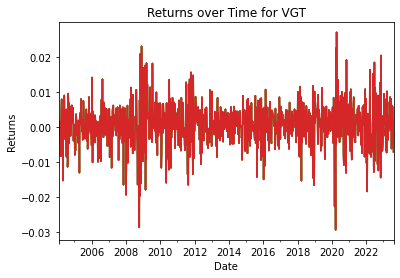

Stock:  VTI
Start_date:  2022-01-01
Expense ratio:  0.03
Total investment: 360000
Final Value:  335875.5298178346
Annualized return: -0.06701241717268158
Annualized ROI: -0.06701241717268164
Sharpe ratio: nan
Longest losing streak (weeks): 5



C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value enco

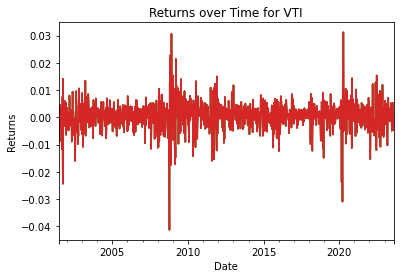

Stock:  SCHD
Start_date:  2022-01-01
Expense ratio:  0.06
Total investment: 360000
Final Value:  360852.1491293794
Annualized return: 0.002367080914942754
Annualized ROI: 0.002367080914942845
Sharpe ratio: nan
Longest losing streak (weeks): 5



C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value enco

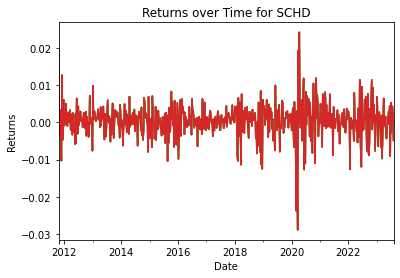

Stock:  VOO
Start_date:  2022-01-01
Expense ratio:  0.14
Total investment: 360000
Final Value:  336789.237070338
Annualized return: -0.06447434147128339
Annualized ROI: -0.06447434147128338
Sharpe ratio: nan
Longest losing streak (weeks): 5



C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value enco

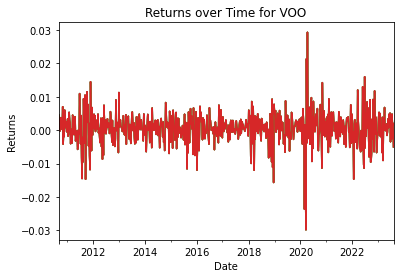

,Stock,expense_ratio,investment_amount,frequency,investment_day,total_investment,final_value,annualized_return,annualized_roi,sharpe_ratio,longest_losing_streak
0,VGT,0.10,1000,daily,monday,360000,318157.009490,-0.116231,-0.116231,NaN,5
1,VTI,0.03,1000,daily,monday,360000,335875.529818,-0.067012,-0.067012,NaN,5
2,SCHD,0.06,1000,daily,monday,360000,360852.149129,0.002367,0.002367,NaN,5
3,VOO,0.14,1000,daily,monday,360000,336789.237070,-0.064474,-0.064474,NaN,5


In [21]:
df = trader.DCA_Portfolio_Multi()
display(df)

In [91]:
df2 = trader.Single_Buy_In_Out_Test()
display(df2)

C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value enco

,Stock,Percent_change,Shares,Annualized_return,Sharpe_ratio
0,VGT,0.25,1,-0.124777,NaN
